##### Nesta etapa, o objetivo é executar todas as ações necessárias para preparar o DataFrame original para passar pelo processo de modelagem.
        Dessa forma, algumas etapas são necessárias:
                Limpeza e tratamento de dados faltantes e outiliers, se necessário;
                Transformação de dados, como a normalização e padronização;
                Feature engineering, com a criação de relações com dados e a verificação de inconsistências;
                Resultado: Um novo DF preparado para a etapa de modelagem. 

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#proximos passos: 
# pre processamento - tratamento de nulos, encoders, novas variaveis,
# entrada da base original -> pre processamento -> base de saida preparada para modelagem

### Importando os dados

In [233]:
train_df = pd.read_csv("train.csv")
df_model = train_df.copy()

Checando rapidamente a base de dados para iniciar a etapa de pre processamento, além da verficação de valores nulos e outliers.

In [234]:
df_model.head() # nunique para checar valores unicos com shape da coluna

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
df_model.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [236]:
df_model.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### É possível observar que existem alguns dados como Age, SibSp, Parch e Fare que podem possuir alguns outliers, principalmente o item "Fare". A distribuição desses dados deverão ser melhor observadas.
##### Além disso, existem 3 colunas com valores nulos, 177 valores em "Age", 687 em "Cabin" e apenas 2 em "Embarked". 

## Data Cleaning

### Verificando e tratando os outliers

Verificando a distribuição de idade dos passageiros

(0, 12)


<Axes: xlabel='Age', ylabel='Count'>

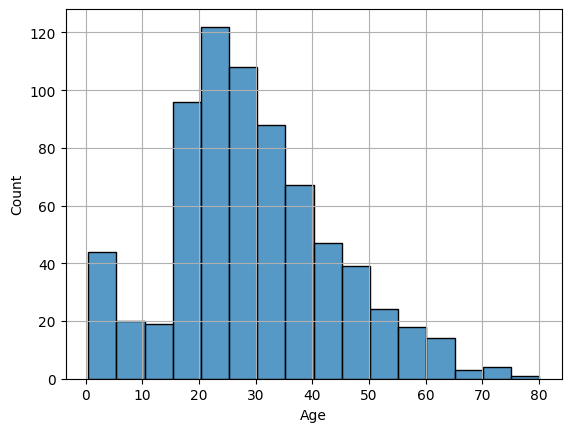

In [237]:
# Observando a distribuição de passageiros da coluna "Age":
age_nao_nulo = df_model.loc[df_model["Age"] != -1]
age_nulo = df_model.loc[df_model["Age"] == -1]
print(age_nulo.shape)

plt.grid(True)
sns.histplot(data= age_nao_nulo, x = "Age", binwidth= 5)

In [238]:
data_mean, data_std = np.mean(age_nao_nulo["Age"]), np.std(age_nao_nulo["Age"])
lower, upper = data_mean - data_std * 3, data_mean + data_std * 3
idx_outliers = np.where((age_nao_nulo["Age"] < lower) | (age_nao_nulo["Age"] > upper))
print(idx_outliers)
# mantém no EDA com bloxplot

(array([630, 851], dtype=int64),)


Observa-se que a distribuição não contém outliers, apesar da maior parte dos passageiros terem entre 15 e 40 anos.

#### Observando possiveis ouliers da coluna "SibSp"

<Axes: xlabel='SibSp', ylabel='Count'>

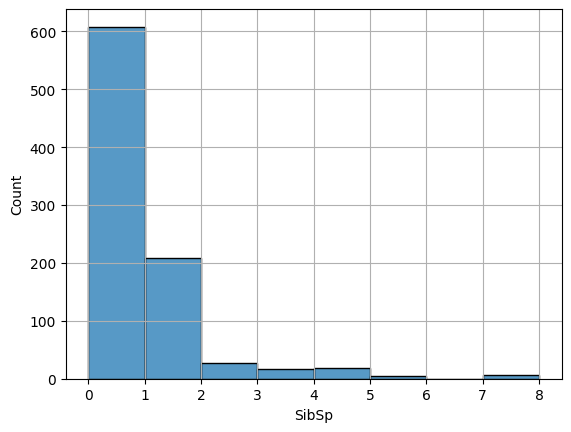

In [239]:
plt.grid(True)
sns.histplot(data= age_nao_nulo, x = "SibSp", binwidth= 1)

In [240]:
data_mean, data_std = np.mean(df_model["SibSp"]), np.std(df_model["SibSp"])
lower, upper = data_mean - data_std * 3, data_mean + data_std * 3
idx_outliers = np.where((df_model["SibSp"] < lower) | (df_model["SibSp"] > upper))
display(idx_outliers)
#display(df_model.loc[idx_outliers])
#EDA

(array([ 16,  50,  59,  68,  71, 119, 159, 164, 171, 180, 182, 201, 233,
        261, 266, 278, 324, 386, 480, 541, 542, 683, 686, 787, 792, 813,
        824, 846, 850, 863], dtype=int64),)

#### Observando possiveis ouliers da coluna "Parch"

<Axes: xlabel='Parch', ylabel='Count'>

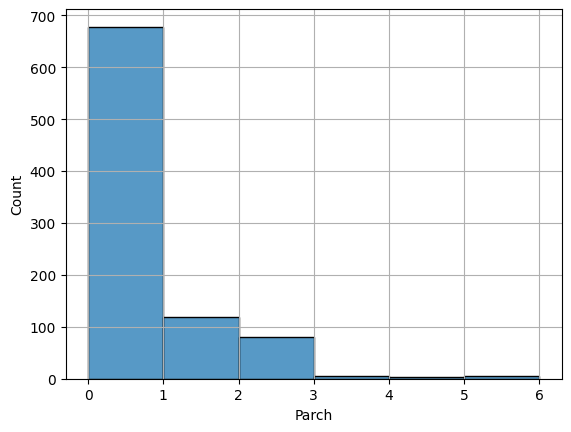

In [241]:
plt.grid(True)
sns.histplot(data= age_nao_nulo, x = "Parch", binwidth= 1)

In [242]:
data_mean, data_std = np.mean(df_model["Parch"]), np.std(df_model["Parch"])
lower, upper = data_mean - data_std * 3, data_mean + data_std * 3
idx_outliers = np.where((df_model["Parch"] < lower) | (df_model["Parch"] > upper))
display(idx_outliers)
display(df_model.loc[idx_outliers])

(array([ 13,  25,  86, 167, 360, 437, 438, 567, 610, 638, 678, 736, 774,
        858, 885], dtype=int64),)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S


#### Observando possiveis ouliers da coluna "Fare"

<Axes: xlabel='Fare', ylabel='Count'>

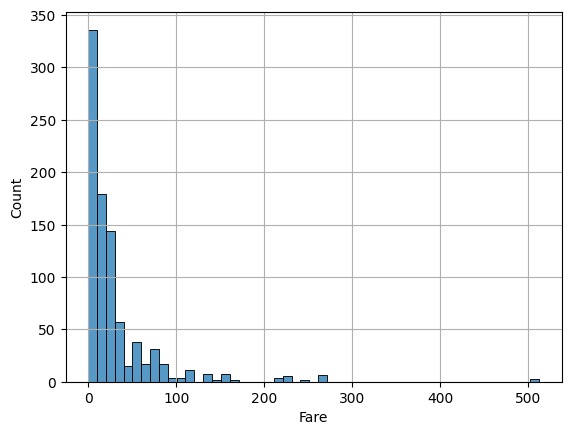

In [243]:
plt.grid(True)
sns.histplot(data= age_nao_nulo, x = "Fare", binwidth= 10)

In [244]:
data_mean, data_std = np.mean(df_model["Fare"]), np.std(df_model["Fare"])
lower, upper = data_mean - data_std * 3, data_mean + data_std * 3
idx_outliers = np.where((df_model["Fare"] < lower) | (df_model["Fare"] > upper))
display(idx_outliers)
display(df_model.loc[idx_outliers])


(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
        689, 700, 716, 730, 737, 742, 779], dtype=int64),)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


Em relação a coluna "Fare" observamos que existem diversos outliers, o que mostra que esses passageiros pagaram muito acima do que o restante em seus tickets.

In [245]:
df_model.groupby("Age")["Name"].count()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Name, Length: 88, dtype: int64

### Tratando dos valores nulos

Pclass
1     30
2     11
3    136
Name: Idade_Definida, dtype: int64

Pclass
1    186
2    173
3    355
Name: Idade_Definida, dtype: int32


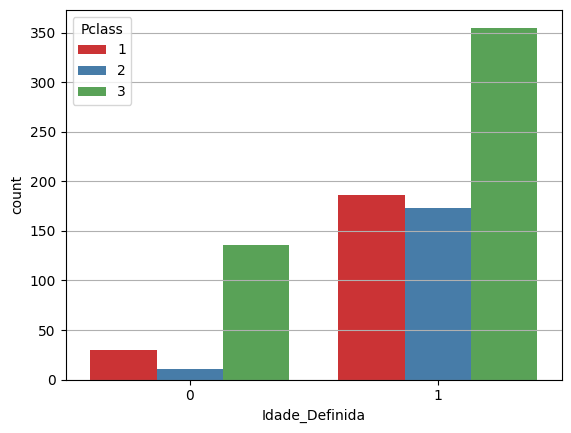

In [246]:
# Verificando a distribuição das classes que tem ou não a idade definida:
df_model['Idade_Definida'] = df_model['Age'].notna().astype(int)

plt.grid(True)
sns.countplot(data= df_model, x = "Idade_Definida", hue= "Pclass", palette= "Set1")
idade_definida = df_model.groupby("Pclass")["Idade_Definida"].sum()
idade_indefinida = df_model.groupby("Pclass")["Idade_Definida"].count() - df_model.groupby("Pclass")["Idade_Definida"].sum()

print(idade_indefinida)
print("")
print(idade_definida)


Com base no gráfico, é possível notar que há certa similaridade na distribuição das classes dos indivíduos sem idade cadastrada, porém, não há, numericamente falando, uma proporção real, logo, esses valores vazios não aparentam ser de origem de captação dos dados, e é possível que haja algum motivo que ainda não é claro sobre a existencia desses valores vazios. Assim, substituiremos esses valores com -1, um valor impossível para esse tipo de dado, a fim de permitir que o modelo separe esse grupo de dados. 

In [247]:
df_model["Age"] = df_model["Age"].fillna(-1)
# descartando a coluna "Idade_Definida", utilizada apenas para checar a distribuição de passageiros com e sem idade definida.
df_model.drop(columns="Idade_Definida", inplace=True)

In [ ]:
# Preenchendo os valores nulos da coluna "Cabin" com dados sintéticos (-1)
train_DF["Cabin"].fillna(-1, inplace= True) # Preenchendo nulls com -1, já fazendo a alteração no DF
train_DF.isnull().sum()

Agora vamos verificar as cabines:

In [248]:
df_model.groupby("Pclass")["Cabin"].count().div(df_model.shape[0])

Pclass
1    0.197531
2    0.017957
3    0.013468
Name: Cabin, dtype: float64

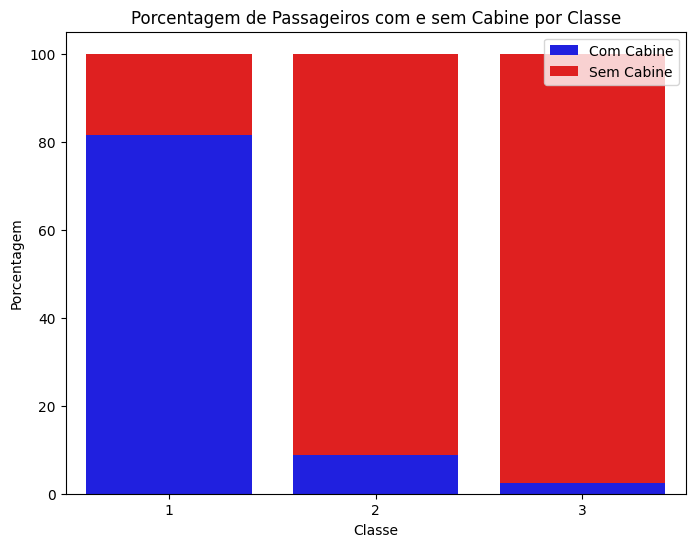

In [249]:
#.div
 # Número total de passageiros por classe
total_passageiros_por_classe = df_model.groupby("Pclass")["PassengerId"].count()

# Número de passageiros com cabine definida por classe
cabine_definida_por_classe = df_model.groupby("Pclass")["Cabin"].count()

# Calculando a porcentagem de cabines definidas por classe
porcentagem_cabine_definida_por_classe = (cabine_definida_por_classe / total_passageiros_por_classe) * 100

# Calculando a porcentagem de cabines não definidas por classe
porcentagem_cabine_indefinida_por_classe = 100 - porcentagem_cabine_definida_por_classe

# Plotando o gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentagem_cabine_definida_por_classe.index, y=porcentagem_cabine_definida_por_classe.values, color='blue', label='Com Cabine')
sns.barplot(x=porcentagem_cabine_definida_por_classe.index, y=porcentagem_cabine_indefinida_por_classe.values, bottom=porcentagem_cabine_definida_por_classe.values, color='red', label='Sem Cabine')
plt.title('Porcentagem de Passageiros com e sem Cabine por Classe')
plt.xlabel('Classe')
plt.ylabel('Porcentagem')
plt.legend()

plt.show()

É possível notar que a grande maioria da primeira classe (80%) tem cabine definida, diferente das classes 2 e 3. Assim, preencheremos com -1 os passageiros sem cabine definida, para que o modelo também separe esse tipo de caso.

In [250]:
df_model["Cabin"] = df_model["Cabin"].fillna("NA")

Agora, uma última ação para preencher nulos no DF: também iremos preencher com -1 os nulos da coluna "Embarked", pois como os inputs padrões são letras, esse preenchimento separará os passageiros que não tinham esse dado definido.

In [251]:
df_model["Embarked"] = df_model["Embarked"].fillna("NA")
# Verificando as modificações realizadas no data frame original:

Agora, removeremos as colunas dispensáveis para o nosso modelo, já que não carregam caracteristica preditora, como por exemplo "PassengerId", ou "Name".

In [252]:
df_model.drop(columns=["PassengerId", "Name", "Ticket"], inplace= True)

## Feature Engineering

Introdução de duas novas métricas ao df original que podem auxiliar a previsão do modelo, após segregação de train_test_split, para evitar data leaked.

In [253]:
# manter mais o teorico, deixando a criação pra modelagem
from sklearn.model_selection import train_test_split

#df_model['Cabin'] = df_model['Cabin'].astype(str) # Definindo o tipo das colunas pré split para garantir o mesmo tipo pós fillna
#df_model['Embarked'] = df_model['Embarked'].astype(str)

df_train, df_test = train_test_split(df_model, random_state= 15)

Criando a métrica da Taxa paga pelo passageiro em relação a taxa média paga pela sua classe. 

In [260]:
# Criando a métrica da Taxa paga pelo passageiro em relação a taxa média paga pela sua classe. 
# Encontrando a Taxa média de cada classe:
taxa_media_classe = df_train.groupby("Pclass")["Fare"].mean() #retirar essa 

df_train["Taxa_PelaMedia"] = df_train["Fare"] / df_train["Pclass"].map(taxa_media_classe)
df_test["Taxa_PelaMedia"] = df_test["Fare"] / df_train["Pclass"].map(taxa_media_classe)

Métrica da Taxa multiplicada a quantidade de irmãos ou conjuges.

In [261]:
df_train["Taxa_x_SibSp"] = df_train["Fare"] * df_train["SibSp"]
df_test["Taxa_x_SibSp"] = df_test["Fare"] * df_test["SibSp"]

## Enconding

Importando e segregando dados para utilização do encoder

In [256]:
from category_encoders.cat_boost import CatBoostEncoder

catboost_encoder = CatBoostEncoder() #verificar se pode ser nulo os argumentos 

# Fazendo o split de X e y:
y_train = df_train["Survived"]
X_train = df_train.drop(columns= "Survived")

In [262]:
df_train.dtypes # 1º - correção dos dtypes; 
#2º Encoder apenas com as colunas de variaveis categoricas: Pclass (Str), Sex (str), Cabin (str), Embarked (str). (drop das outras colunas)

Pclass              int64
Survived            int64
Sex                object
Age               float64
SibSp               int64
Parch               int64
Fare              float64
Cabin              object
Embarked           object
Taxa_PelaMedia    float64
Taxa_x_SibSp      float64
dtype: object

Utilizando efetivamente o encoder 

In [257]:
catboost_encoder.fit(X_train, y_train)

#guardando em um novo DF os dados já codificados
X_train_encoded = catboost_encoder.transform(X_train)

## Salvando os dados

In [258]:
# Utilizando a extensão parquet para salvar os datasets:
# Unindo o X e y pós encoder
df_train = pd.concat([X_train, y_train], axis=1)

# Reordenar as colunas para que "Survived" fique na segunda posição
cols = df_train.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
df_train = df_train[cols]



In [259]:
df_train.to_parquet('df_train_encoded.parquet')
df_test.to_parquet('df_test.parquet')

### Conclusão

Após toda a etapa de pré processamento ser realizada, incluindo a criação do código com as etapas resumidas para aplicação em novos dados, a próxima etapa é a modelagem, onde a execução dos modelos ocorrerá.